In [1]:
import tkinter as tk
import numpy as np
import graphviz as gv
import matplotlib.pyplot as plt
import collections 
import heapq
import os

In [2]:
class Nodohuff:
    def __init__(self, sym, frec, izq=None, der=None):
        self.sym = sym
        self.frec = frec
        self.izq = izq
        self.der = der
        self.dir= ''

    def __lt__(self, otro):
        return self.frec < otro.frec 

    def __repr__(self):
        return f"Nodohuff(sym={self.sym}, frec={self.frec})"
    
def frecuencia_caracter(string):
        frecuencia_caracter = collections.Counter(string)
        #print(frecuencia_caracter)
        lista=[]
        for key, value in frecuencia_caracter.items():
            sym = key 
            frec = value
            nodo = Nodohuff(sym, frec)
            lista.append(nodo)
        tabla_frecuencia= plt.bar([nodo.sym for nodo in lista], [nodo.frec for nodo in lista],fc='Turquoise',ec='Black')
        plt.bar_label(tabla_frecuencia,labels=[nodo.frec for nodo in lista],label_type='edge',fontsize=12,padding=3)
        plt.title('Frecuencia Caracteres', fontsize=20)
        plt.xlabel('Caracteres')
        plt.ylabel('Frecuencia')
        plt.show()
        return lista
    
def mkarbol_huff(string): 
        frecuencia_caracter = collections.Counter(string)

        no_usado = []
        for key, value in frecuencia_caracter.items():
            sym=key
            frec=value
            nodo= Nodohuff(sym, frec)
            #print (nodo)
            heapq.heappush(no_usado,nodo)
            #print(no_usado)
        return no_usado
    
def sortarbol_huff(no_usado):
        while len(no_usado)>1:
            izq = heapq.heappop(no_usado)
            der = heapq.heappop(no_usado)
            #print(izq, der)
            izq.dir = '0'
            der.dir = '1'
            #print(no_usado)
            newnodo = Nodohuff(None, izq.frec + der.frec, izq, der)
            #print(newnodo)
            heapq.heappush(no_usado, newnodo)
            #print(no_usado)
        return no_usado
    
def printnodos(nodo, val=''):
        newval=val+str(nodo.dir)

        if nodo.izq:
            printnodos(nodo.izq, newval) 
        if nodo.der:
            printnodos(nodo.der, newval)

        if(not nodo.izq and not nodo.der):
            print(f"{nodo.sym} -> {newval}")

def freshfile():
        fpath = r'C:\Dev\UPC\U2024-2\Mat Computacional\TB1\compresion.huf'
        if os.path.exists(fpath):
            fp = open('compresion.huf', 'w')
            fp.close()
            return
        else:
             return
                 
def printfile(nodo, val=''):
        fp=open('compresion.huf','a')
        newval=val+str(nodo.dir)
        if nodo.izq:
             printfile(nodo.izq, newval)
        if nodo.der:
            printfile(nodo.der, newval)
        if(not nodo.izq and not nodo.der):
            fp.write(nodo.sym+'/'+newval+'')          

def mkgraph(arbol):
        dot = gv.Digraph('Arbol_Huffman')
        cont=0
        aux=[]
        while len(arbol)>0:
            nodo = heapq.heappop(arbol)
            if cont%2==0:
                nodo.dir = '0'
            elif cont%2!=0:
                nodo.dir = '1'
            if nodo.dir == '0':
                newnodo = Nodohuff(nodo.sym, nodo.frec, nodo,None )
            elif nodo.dir == '1':
                newnodo = Nodohuff(nodo.sym, nodo.frec,None , nodo)
            aux.append(newnodo)
            cont+=1
        nodofinal=Nodohuff('HUFF', None,None,None)
        aux.append(nodofinal)
        for i in aux:    
            dot.node(str(i.sym))
        print(aux)
        return dot

In [3]:
string = "mama amo a mamama"

[Nodohuff(sym=o, frec=1), Nodohuff(sym= , frec=3), Nodohuff(sym=m, frec=6), Nodohuff(sym=a, frec=7), Nodohuff(sym=HUFF, frec=None)]


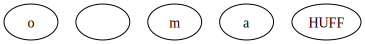

In [4]:
arbol_grph = mkarbol_huff(string)
mkgraph(arbol_grph)

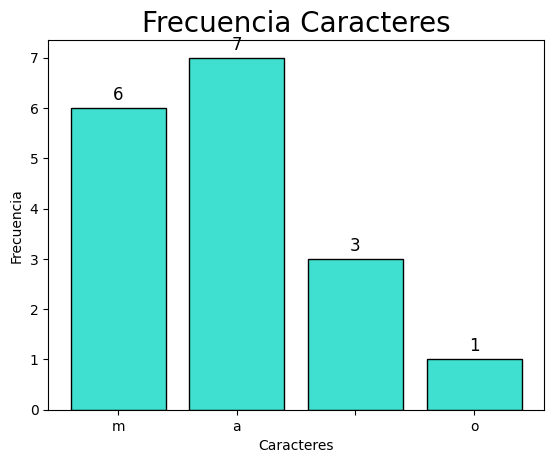

In [5]:
lista = frecuencia_caracter(string)

In [6]:
arbol_pre = mkarbol_huff(string)
arbol_sort = sortarbol_huff(arbol_pre)
printnodos(arbol_sort[0])
freshfile()
printfile(arbol_sort[0])


a -> 0
o -> 100
  -> 101
m -> 11
